In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)


100%|██████████| 22.0M/22.0M [00:00<00:00, 44.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [ ]:
#parsing through the .idx files manually

import numpy as np
import struct

def load_mnist_images(file_path):
  with open(file_path, "rb") as f:
    magic, num , rows, cols = struct.unpack(">IIII", f.read(16))
    if magic != 2051:
      raise ValueError("Invali magic number {} in MNIST file {}".format(magic, file_path))
    images = np.frombuffer(f.read(), dtype = np.uint8)
    images = images.reshape(num, rows, cols)
    return images


def load_mnist_labels(file_path):
  with open(file_path , "rb") as f:
    magic, num = struct.unpack(">II", f.read(8))
    if magic != 2049:
      raise ValueError("Invalid magin number {} in MNIST file {}".format(magic, file_path))
    labels = np.frombuffer(f.read(), dtype = np.uint8)
    return labels



In [ ]:
#loading train and test data

x_train_path = "/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-images.idx3-ubyte"
y_train_path = "/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-labels.idx1-ubyte"
x_test_path = "/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-images.idx3-ubyte"
y_test_path = "/root/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/t10k-labels.idx1-ubyte"

x_train = load_mnist_images(x_train_path)
x_test = load_mnist_images(x_test_path)
y_train = load_mnist_labels(y_train_path)
y_test = load_mnist_labels(y_test_path)

print("X_trian shape :", x_train.shape)
print("Y_train shape : ", y_train.shape)
print("X_test shape :", x_test.shape)
print("Y_test shape : ", y_test.shape)

X_trian shape : (60000, 28, 28)
Y_train shape :  (60000,)
X_test shape : (10000, 28, 28)
Y_test shape :  (10000,)


In [ ]:
#scaling the data
x_train_scaled , x_test_scaled = x_train / 255.0 , x_test / 255.0

x_train_scaled = x_train_scaled .reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

In [ ]:
# one-hot encoding

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

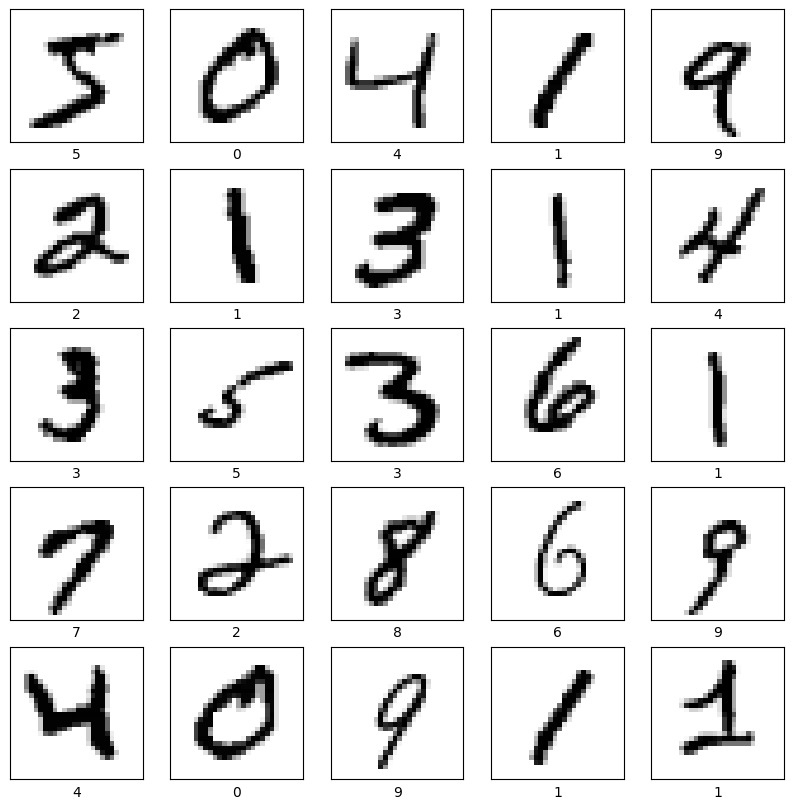

In [ ]:
# visualising first 25 samples :

plt.figure(figsize = (10, 10))

for i in range(25):
  plt.subplot(5, 5,i+1)
  plt.xticks([      ])
  plt.yticks([      ])
  plt.grid(False)
  plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
  plt.xlabel(y_train[i].argmax())
plt.show()

In [ ]:
# creating the model

input_img = tf.keras.Input(shape = (28, 28, 1))

Z1 = tf.keras.layers.Conv2D(filters = 32, kernel_size = 4, strides = (1,1), padding = "same")(input_img)

A1 = tf.keras.layers.ReLU()(Z1)

P1 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = "same")(A1)

Z2 = tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, strides = (1,1), padding = "same")(P1)

A2 = tf.keras.layers.ReLU()(Z2)

P2 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = "same")(A2)

F1 = tf.keras.layers.Flatten()(P2)

F2 = tf.keras.layers.Dense(128, activation = "relu")(F1)

F2 = tf.keras.layers.Dropout(0.5)(F2)


outputs = tf.keras.layers.Dense(10, activation = "softmax")(F2)

model = tf.keras.Model(inputs = input_img, outputs = outputs)


In [ ]:
#model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_11 (ReLU)                      │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_12 (ReLU)                      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,626 (1.57 MB)

 Trainable params: 411,626 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compiling the model and setting loss function and metric

model.compile( optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# training the model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

checkpoint = ModelCheckpoint("best_mnist_cnn.keras", monitor="val_loss", save_best_only = True)
history = model.fit(x_train_scaled, y_train,
                    epochs = 20,
                    batch_size = 64,
                    validation_split = 0.1,
                    callbacks = [early_stop, checkpoint])

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 73ms/step - accuracy: 0.9605 - loss: 0.1297 - val_accuracy: 0.9880 - val_loss: 0.0411
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9772 - loss: 0.0755 - val_accuracy: 0.9888 - val_loss: 0.0427
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.9806 - loss: 0.0647 - val_accuracy: 0.9892 - val_loss: 0.0360
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 61s 72ms/step - accuracy: 0.9846 - loss: 0.0499 - val_accuracy: 0.9917 - val_loss: 0.0320
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.9884 - loss: 0.0373 - val_accuracy: 0.9915 - val_loss: 0.0356
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.9904 - loss: 0.0303 - val_accuracy: 0.9905 - val_loss: 0.0352
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9910 - loss: 0.0292 - 

In [ ]:
# loading th3e best weights

print(model.load_weights("best_mnist_cnn.keras"))

test_loss, test_acc = model.evaluate(x_test_scaled, y_test)

None
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9911 - loss: 0.0281


In [ ]:
print("test loss : ", test_loss)
print(f"test accuracy : {test_acc:.4f}")

test loss :  0.022137198597192764
test accuracy : 0.9932


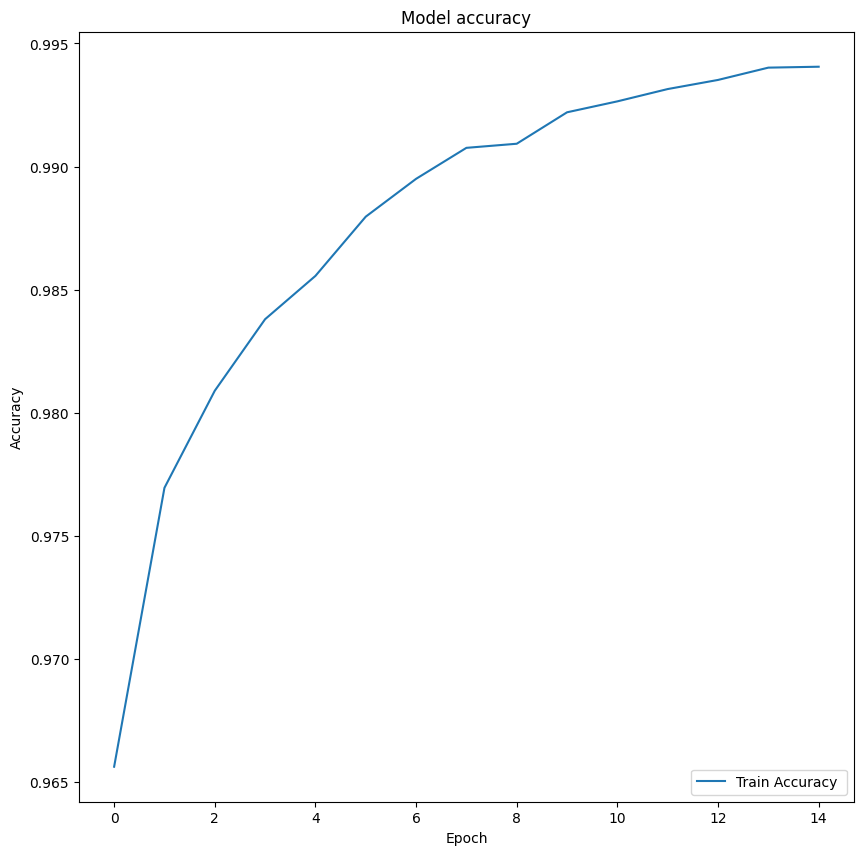

In [ ]:
plt.figure(figsize = (10, 10))

plt.plot(history.history['accuracy'], label = "Train Accuracy ")
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()


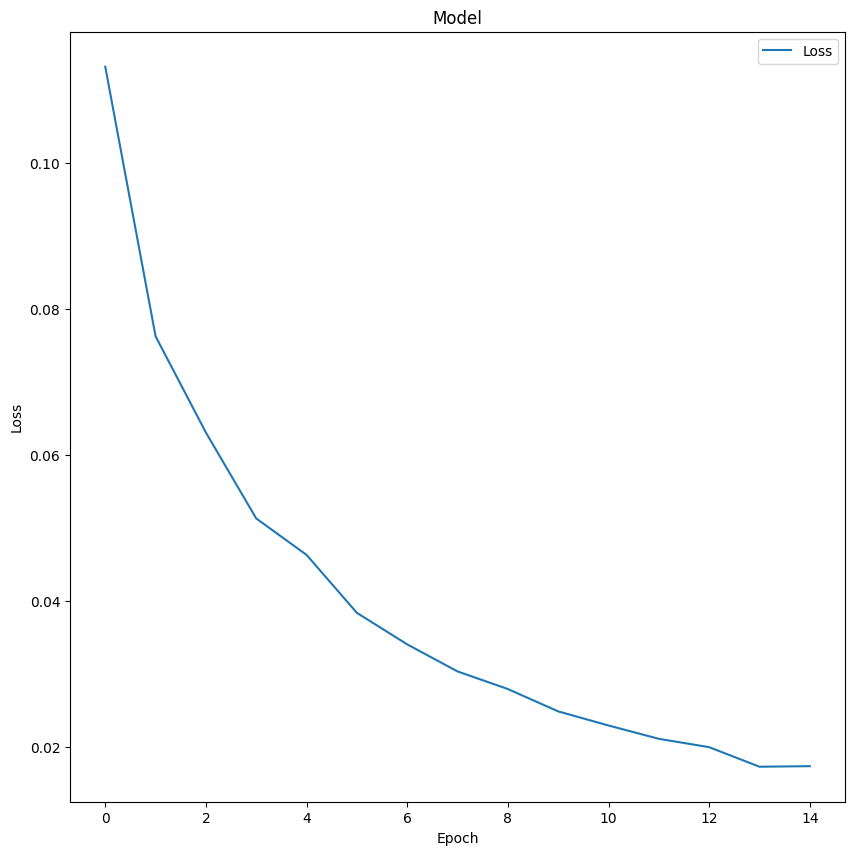

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(history.history['loss'], label = "Loss")
plt.title("Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc = "upper right")
plt.show()